<a href="https://colab.research.google.com/github/YonDraco/learn-pyimagesearch/blob/master/3_loading_model_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

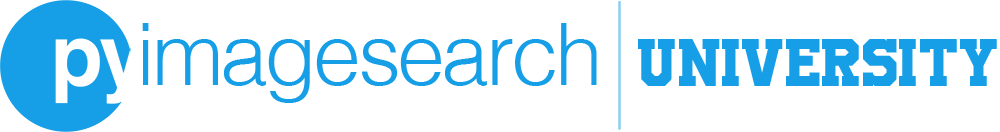

# Load a trained Keras/TensorFlow model from disk
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch University](https://pyimg.co/university)** Jupyter Notebooks!

This notebook is associated with the [Load a trained Keras/TensorFlow model from disk](https://www.pyimagesearch.com/2021/05/22/load-a-trained-keras-tensorflow-model-from-disk/) blog post published on 2021-05-22.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch University Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2021 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch University at https://pyimg.co/university today.*

### Download the code zip file

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/loading-model-keras/loading-model-keras.zip
!unzip -qq loading-model-keras.zip
%cd loading-model-keras
!wget https://pis-datasets.s3.us-east-2.amazonaws.com/animals.zip
!unzip -qq animals.zip

--2021-08-25 17:17:06--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/loading-model-keras/loading-model-keras.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.246.89
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.246.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 380090 (371K) [binary/octet-stream]
Saving to: ‘loading-model-keras.zip’

loading-model-keras 100%[===================>] 371.18K  2.38MB/s    in 0.2s    

2021-08-25 17:17:06 (2.38 MB/s) - ‘loading-model-keras.zip’ saved [380090/380090]

/content/loading-model-keras
--2021-08-25 17:17:06--  https://pis-datasets.s3.us-east-2.amazonaws.com/animals.zip
Resolving pis-datasets.s3.us-east-2.amazonaws.com (pis-datasets.s3.us-east-2.amazonaws.com)... 52.219.96.144
Connecting to pis-datasets.s3.us-east-2.amazonaws

## Blog Post Code

### Import Packages

In [2]:
# import the necessary packages
from pyimagesearch.preprocessing import ImageToArrayPreprocessor
from pyimagesearch.preprocessing import SimplePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from tensorflow.keras.models import load_model
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

### Loading a Pre-trained Model from Disk

In [4]:
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", required=True,
# 	help="path to input dataset")
# ap.add_argument("-m", "--model", required=True,
# 	help="path to pre-trained model")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"dataset": "animals",
    "model": "shallownet_weights.hdf5"
}

In [5]:
# initialize the class labels
classLabels = ["cat", "dog", "panda"]

In [6]:
# grab the list of images in the dataset then randomly sample
# indexes into the image paths list
print("[INFO] sampling images...")
imagePaths = np.array(list(paths.list_images(args["dataset"])))
idxs = np.random.randint(0, len(imagePaths), size=(10,))
imagePaths = imagePaths[idxs]

[INFO] sampling images...


In [7]:
# initialize the image preprocessors
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths)
data = data.astype("float") / 255.0

In [8]:
# load the pre-trained network
print("[INFO] loading pre-trained network...")
model = load_model(args["model"])

[INFO] loading pre-trained network...


In [9]:
# make predictions on the images
print("[INFO] predicting...")
preds = model.predict(data, batch_size=32).argmax(axis=1)

[INFO] predicting...


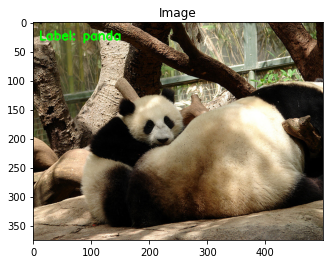

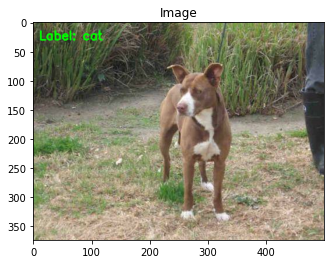

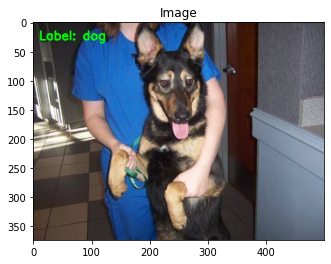

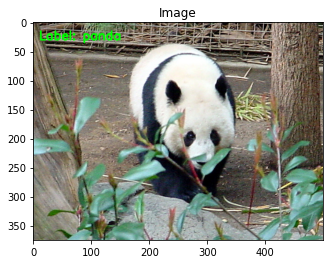

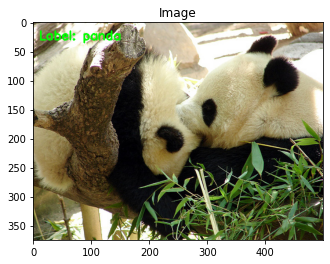

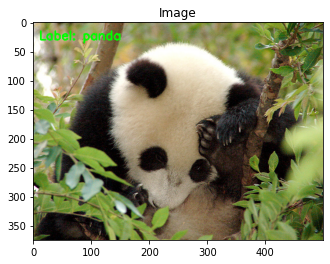

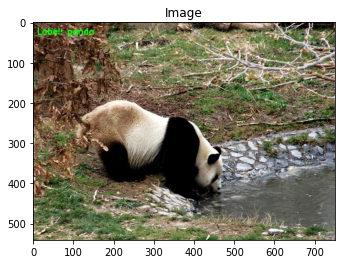

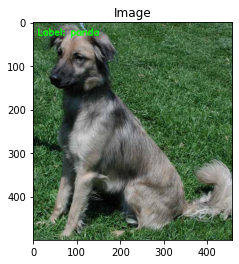

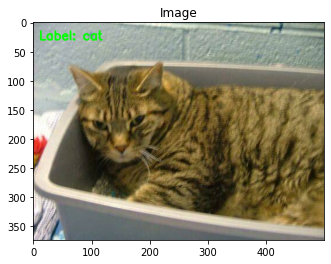

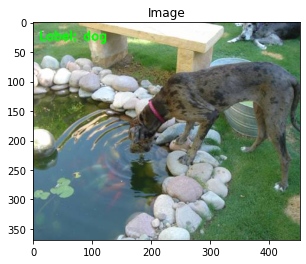

In [10]:
# loop over the sample images
for (i, imagePath) in enumerate(imagePaths):
	# load the example image, draw the prediction, and display it
	# to our screen
	image = cv2.imread(imagePath)
	cv2.putText(image, "Label: {}".format(classLabels[preds[i]]),
		(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
	plt_imshow("Image", image)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Load a trained Keras/TensorFlow model from disk*](https://www.pyimagesearch.com/2021/05/22/load-a-trained-keras-tensorflow-model-from-disk/) published on 2021-05-22.

# Code License Agreement
```
Copyright (c) 2021 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```